# HOMEWORK 11

In this homework you are going to improve the DNN for house price estimation we built during the lesson. The objective is to beat the performance (i.e. to get a closer estimation) of the last network we built in the lecture.

The structure of this homework is as follows:
 * First, we are going to build the reference network (exactly the same network we implemented in the lecture).
 * You are going to run it a write down the price estimation error (Validation MAE).
 * Then you are going to make some modifications in order to make the network perform better.
 
In the section **Tasks** you will find what modification you'll need to implement as well as some hints.
 
At the end, as usual, there are some question waiting for you to answer :-)

In [1]:
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

from tensorflow.keras import Model, metrics
from tensorflow.keras.layers import Dense, Dropout, Input

# Set the seeds
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Data Preparation

Let's load the data and prepare the training sets.

In [2]:
dataset = pd.read_csv('data/train.csv')

features = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt']
data = dataset[features]

# Filling nan with the mean of the column:
data = data.fillna(data.mean())

# Extract input values and normalize
x = data[features[1:]]
scale = StandardScaler()
x = scale.fit_transform(x)

# Extract output values (prices) and normalize
y = data[features[0]].values
y = y/100000

# Split into 75% for train and 25% for test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed_value)

Let's use the same plotting helper we used in the lecture.

In [3]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, np.array(h['mean_absolute_error'])*1e5, '.-',
                               epochs, np.array(h['val_mean_absolute_error'])*1e5, '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('MAE')
    plt.legend(['Train', 'Validation'])
        
    print('Train MAE     ', h['mean_absolute_error'][-1]*1e5)
    print('Validation MAE', h['val_mean_absolute_error'][-1]*1e5)

### Building the Network

In [4]:
inputs = Input(shape=x.shape[1])
outputs = Dense(5, activation='relu')(inputs)
outputs = Dense(1, activation='linear')(outputs)
model = Model(inputs, outputs)

model.compile(optimizer ='adam', loss ='mean_squared_error', metrics =[metrics.mae])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


### Training the Network

Train MAE      23051.318526268005
Validation MAE 25549.468398094177


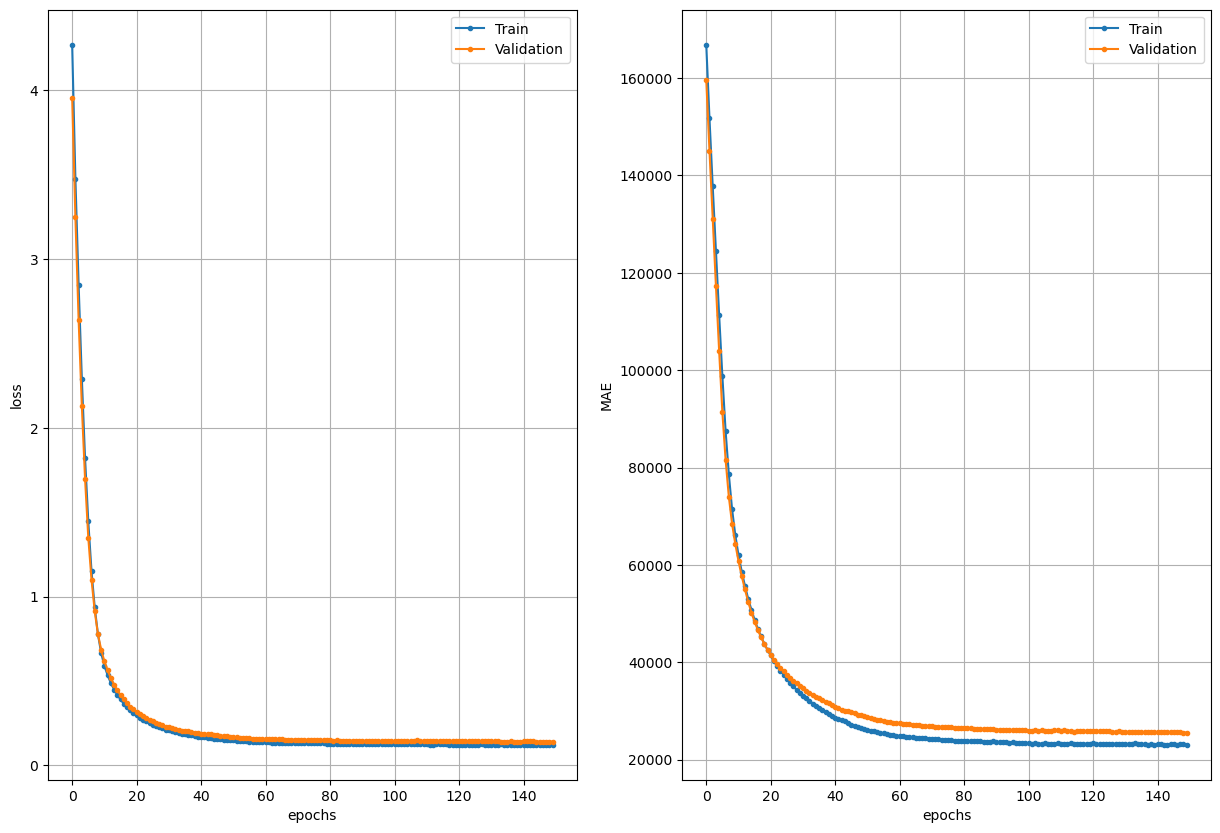

In [5]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=32, verbose=0)
plot_history(history)

### Tasks

Improve the network so you obtain a better estimation error than the reference. You can try the following:
* Add a new feature to your inputs. For instance, `LotArea` (lot size in square feet) seems like a good candidate :-)
* Try increasing the number of neurons in the first layer. Currently, we have 5 neurons there, what happens if we increase it to 10?

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_2 (Dense)             (None, 10)                70        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Train MAE      21556.739509105682
Validation MAE 24277.65280008316


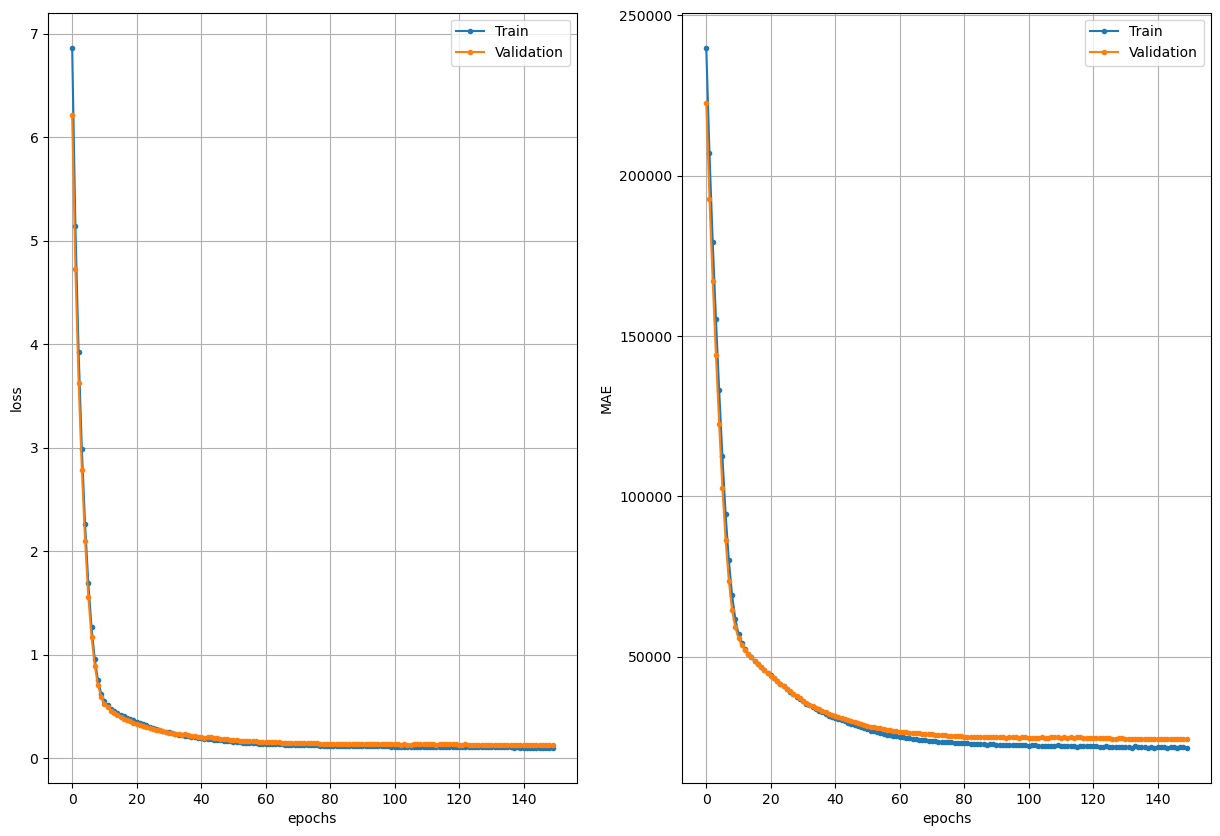

In [6]:
# readjust dataset function, there are a few parameters: f - features array, n - neurons count
def resetNN(f, n):
    features = f
    data = dataset[features]

    # Filling nan with the mean of the column:
    data = data.fillna(data.mean())

    # Extract input values and normalize
    x = data[features[1:]]
    scale = StandardScaler()
    x = scale.fit_transform(x)

    # Extract output values (prices) and normalize
    y = data[features[0]].values
    y = y/100000

    # Split into 75% for train and 25% for test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed_value)

    # build the network

    inputs = Input(shape=x.shape[1])
    outputs = Dense(n, activation='relu')(inputs)
    outputs = Dense(1, activation='linear')(outputs)
    model = Model(inputs, outputs)

    model.compile(optimizer ='adam', loss ='mean_squared_error', metrics =[metrics.mae])
    model.summary()

    # train the network

    history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=32, verbose=0)
    plot_history(history)
    
# let`s try to add a LotArea feauture and change neuron count to 10
resetNN(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt', 'LotArea'], 10)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_4 (Dense)             (None, 5)                 35        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Train MAE      25668.45715045929
Validation MAE 26964.3634557724


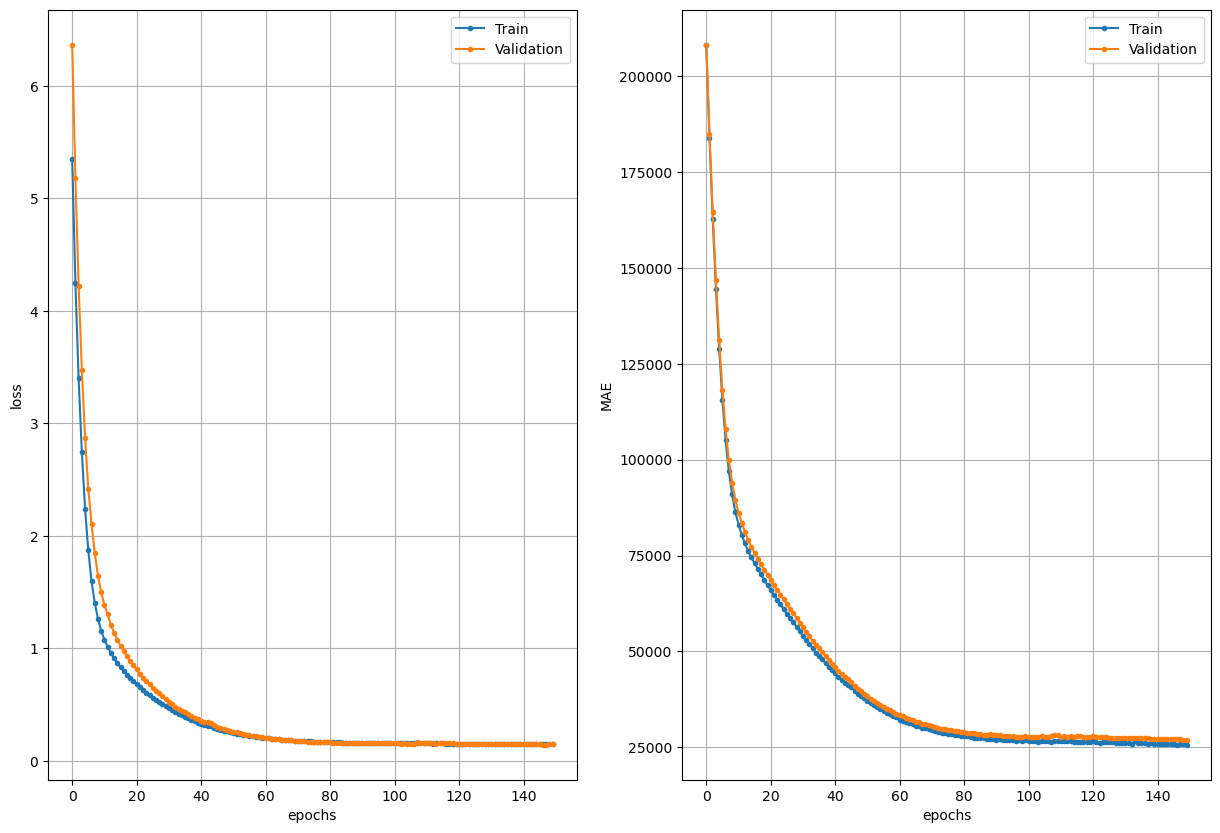

In [7]:
# Not bad, Now let's try to train the network by changing only the features count
resetNN(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt', 'LotArea'], 5)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_6 (Dense)             (None, 10)                60        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________
Train MAE      22424.083948135376
Validation MAE 25415.54570198059


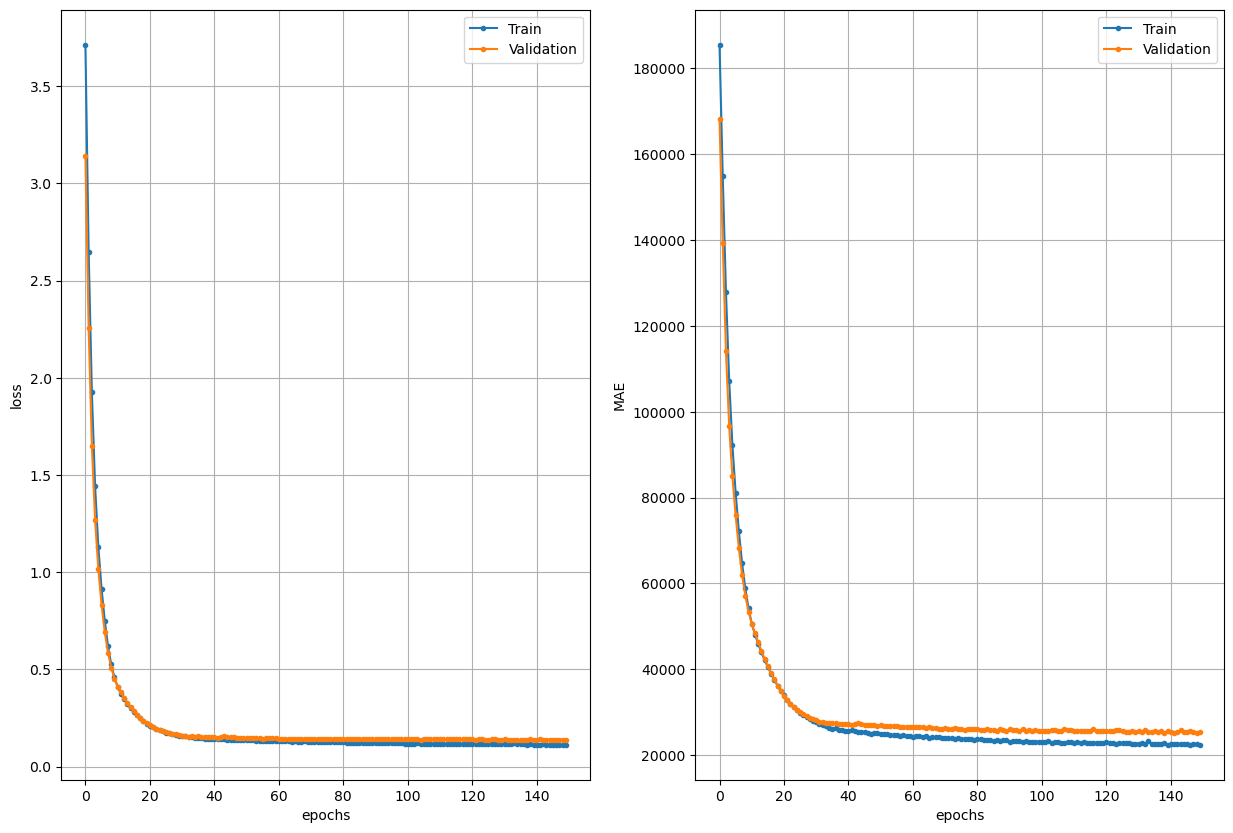

In [8]:
# It has become worse. Now let's try to train the network by changing only the neurons count 
resetNN(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt'], 10)

### Questions

* What is the new price estimation error after your modifrications? Is it better than before?

`Yes, adding a new feature (LotArea) and changing neurons count from 5 to 10 makes the mean absolute error (prices deviation) a little bit better (less): from 23,051$ to 21,556$`

* Does adding more features help?

`Without increasing neurons count it looks like no, but it seems that if we proportionally increase the number of features and neurons it'll work much accurate`

* Does adding more neurons help?

`The accuracy will increase a little bit. But proportionally increasing the number of features and neurons works much better`

* What would you do to improve the network even further?

`I'd try to use much more features of the dataset and much more neurons count, let's try it :)`

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense_8 (Dense)             (None, 100)               1600      
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,701
Trainable params: 1,701
Non-trainable params: 0
_________________________________________________________________
Train MAE      10162.276029586792
Validation MAE 20492.100715637207


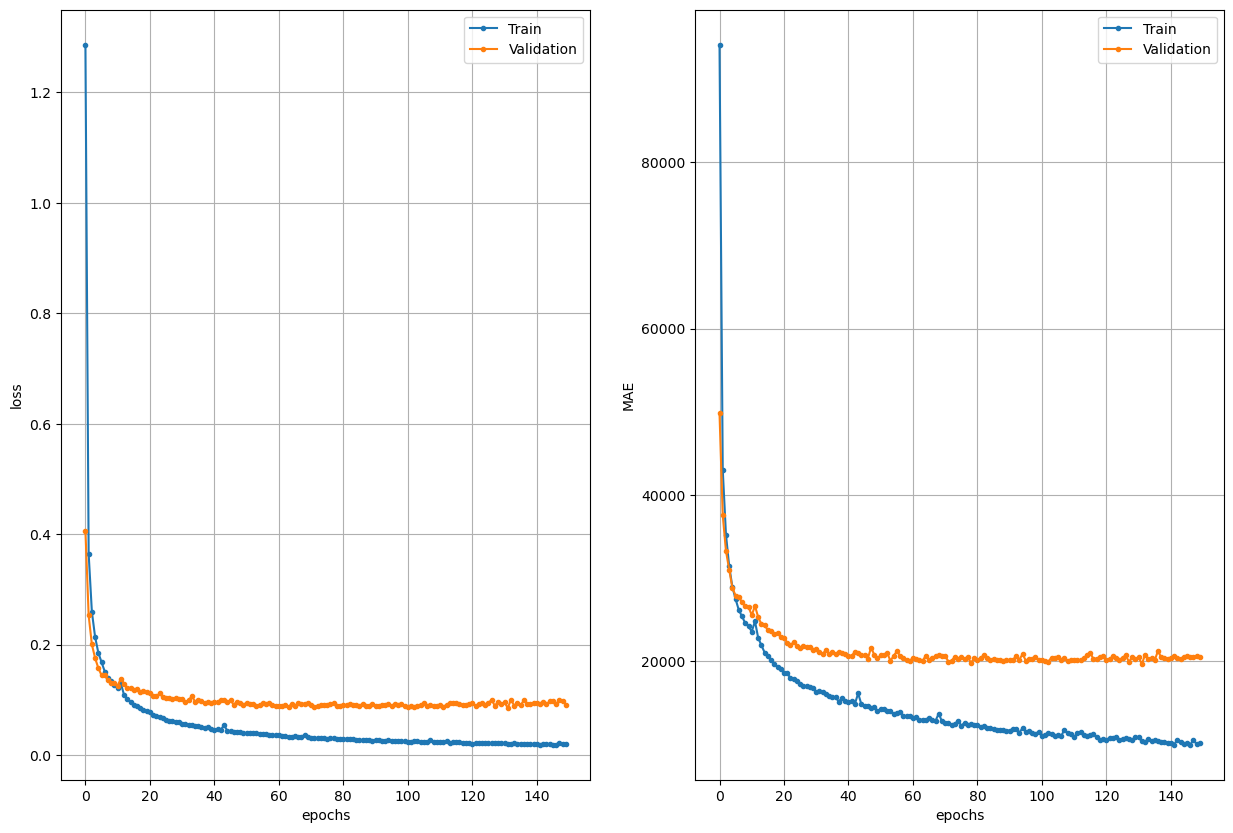

In [9]:
# let`s try to more feautures and change neuron count to 100
resetNN(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt', 'LotArea', 
         'OverallCond', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageYrBlt', 'GarageArea', 
         'WoodDeckSF', 'OpenPorchSF', 'YrSold'], 100)

### Perfect, the price deviation reduced by 2 times! Now MAE is 10,162$